
План проекта:

Шаг 1. Откройте файл с данными и изучите общую информацию

Шаг 2. Подготовьте данные

Приведите данные к нужным типам;
Найдите и исправьте ошибки в данных.
Посчитайте для каждого пользователя: количество сделанных звонков и израсходованных минут разговора по месяцам; количество отправленных сообщений по месяцам; объем израсходованного интернет-трафика по месяцам; помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).
Шаг 3. Проанализируйте данные

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
Посчитайте среднее количество, дисперсию и стандартное отклонение.
Постройте гистограммы.
Опишите распределения.
Шаг 4. Проверьте гипотезы:

средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;
Пороговое значение alpha задайте самостоятельно.

Шаг 5. Напишите общий вывод

Описание данных

Таблица users (информация о пользователях):

user_id — уникальный идентификатор пользователя
first_name — имя пользователя
last_name — фамилия пользователя
age — возраст пользователя (годы)
reg_date — дата подключения тарифа (день, месяц, год)
churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
city — город проживания пользователя
tariff — название тарифного плана
Таблица calls (информация о звонках):

id — уникальный номер звонка
call_date — дата звонка
duration — длительность звонка в минутах
user_id — идентификатор пользователя, сделавшего звонок
Таблица messages (информация о сообщениях):

id — уникальный номер сообщения
message_date — дата сообщения
user_id — идентификатор пользователя, отправившего сообщение
Таблица internet (информация об интернет-сессиях):

id — уникальный номер сессии
mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
session_date — дата интернет-сессии
user_id — идентификатор пользователя
Таблица tariffs (информация о тарифах):

tariff_name — название тарифа
rub_monthly_fee — ежемесячная абонентская плата в рублях
minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
messages_included — количество сообщений в месяц, включённых в абонентскую плату
mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
rub_per_message — стоимость отправки сообщения сверх тарифного пакета
rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

1. Открыть файлы с данными и изучить общую информацию

In [292]:
#импортирую необходимые бибилиотеки
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML, display

In [293]:
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

In [294]:
print('Инфо по таблице users:')
print(users.info())
print()
print('Инфо по таблице calls:')
print(calls.info())
print()
print('Инфо по таблице messages:')
print(messages.info())
print()
print('Инфо по таблице internet:')
print(internet.info())
print()
print('Инфо по таблице tariffs:')
print(tariffs.info())

Инфо по таблице users:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None

Инфо по таблице calls:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None

Инфо по таблице messages:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-

In [295]:
display(users.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [296]:
display(calls.tail())

,id,call_date,duration,user_id
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499
202606,1499_219,2018-12-14,19.62,1499


In [297]:
display(messages.head())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [298]:
display(internet.head())

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [299]:
internet.drop('Unnamed: 0', axis='columns', inplace=True)

In [300]:
print(internet['mb_used'].max())
print(internet['mb_used'].median())
print(internet.sample(10))

1724.83
348.015
              id  mb_used session_date  user_id
105643   1357_70   524.91   2018-11-15     1357
104395  1353_331   111.41   2018-10-03     1353
142637    1478_1    19.17   2018-12-08     1478
121193  1409_160     0.00   2018-11-22     1409
59296   1200_126   577.73   2018-05-01     1200
86605    1293_50   828.25   2018-09-20     1293
43759    1151_12   794.43   2018-09-24     1151
134796   1453_17   682.84   2018-08-14     1453
136981   1459_61   400.46   2018-10-17     1459
6237    1019_168   465.09   2018-07-13     1019


In [301]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Вывод по шагу 1:

Имеем 5 датасетов. Пропусков нет. В таблице users есть 2 строки с датами типа object, которые нужно будет привести к datetime, как и в других таблицах. User_id идут от 1000 до 1499. Строки duration таблицы calls и mb_used таблицы internet имеют тип float. Так как Мегалайн округляет значения трафика и минут в большую сторону до целых чисел, их типы данных можно юужет заменить на int. Также в фрейме с данными о трафике был ненужный столбец "Unnamed".

2. Подготавливаю данные

Меняю типы данных:

In [302]:
#ведь Мегалайн округляет все в большую сторону 
# + я не хочу потерять звонки продолжительностью до 50 секунд

calls['duration'] = calls['duration'].apply(np.ceil) 
internet['mb_used'] = internet['mb_used'].apply(np.ceil)

In [303]:
# internet['gb_used'] = internet['mb_used'] / 1024
# internet['gb_used'] = internet['gb_used'].apply(np.ceil)

In [304]:
calls['duration'] = calls['duration'].astype(int)
internet['mb_used'] = internet['mb_used'].astype(int)

In [305]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [306]:
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None


In [307]:
print(calls['duration'].value_counts())

0     39613
7     11510
6     11457
5     11411
8     11272
9     10973
4     10918
3     10362
10    10186
11     9385
2      9194
12     8448
1      8402
13     7486
14     6554
15     5505
16     4551
17     3671
18     2984
19     2411
20     1806
21     1304
22      975
23      720
24      468
25      363
26      257
27      151
28      104
29       56
30       39
31       30
32       17
33       10
35        5
34        3
36        2
37        2
38        2
Name: duration, dtype: int64


Кажется, у кого-то телефон слишком часто стоит в беззвуке. почти 40 тысяч пропущенных! Жалко отказываться от такого объема данных, но пропущенные вызовы не приносят компании деняг, поэтому придётся попращаться.

In [308]:
calls = calls.query('duration > 0')

In [309]:
print(internet['mb_used'].value_counts())

0       19598
333       231
382       228
377       224
334       222
        ...  
1495        1
1624        1
1371        1
1423        1
1279        1
Name: mb_used, Length: 1424, dtype: int64


In [310]:
# internet = internet.query('gb_used > 0')
internet = internet.query('mb_used > 0')

In [311]:
print(users['city'].unique())

['Краснодар' 'Москва' 'Стерлитамак' 'Новокузнецк' 'Набережные Челны'
 'Ульяновск' 'Челябинск' 'Пермь' 'Тюмень' 'Самара' 'Санкт-Петербург'
 'Иваново' 'Чебоксары' 'Омск' 'Уфа' 'Томск' 'Чита' 'Мурманск'
 'Петрозаводск' 'Тверь' 'Екатеринбург' 'Махачкала' 'Вологда' 'Череповец'
 'Ярославль' 'Сочи' 'Хабаровск' 'Ставрополь' 'Рязань' 'Улан-Удэ' 'Тула'
 'Саратов' 'Ростов-на-Дону' 'Казань' 'Иркутск' 'Курск' 'Калуга' 'Якутск'
 'Астрахань' 'Химки' 'Владикавказ' 'Волгоград' 'Саранск' 'Ижевск'
 'Новосибирск' 'Брянск' 'Тольятти' 'Нижний Тагил' 'Орёл' 'Белгород'
 'Воронеж' 'Волжский' 'Курган' 'Барнаул' 'Красноярск' 'Архангельск'
 'Липецк' 'Кемерово' 'Киров' 'Сургут' 'Пенза' 'Магнитогорск'
 'Нижний Новгород' 'Кострома' 'Владивосток' 'Тамбов' 'Балашиха'
 'Севастополь' 'Калининград' 'Оренбург' 'Смоленск' 'Нижневартовск'
 'Владимир' 'Новороссийск' 'Грозный' 'Подольск']


Ошибок с городами нет. Москва есть Москва, а не МСК/мск.

In [312]:
print(users.duplicated().sum())
print(calls.duplicated().sum())
print(messages.duplicated().sum())
print(internet.duplicated().sum())

0
0
0
0


Перехожу к расчетам новых столбцов по каждому пользователю. Звонки, минуты и трафик по месяцам:

In [313]:
calls['month_of'] = calls['call_date'].dt.month
messages['month_of'] = messages['message_date'].dt.month
internet['month_of'] = internet['session_date'].dt.month

In [314]:
calls_count = calls.pivot_table(index=
                                ['user_id', 'month_of'], values='duration', 
                                aggfunc=['count', 'sum']).rename(columns={'duration': 'total_calls'})
calls_count.reset_index()
calls_count

count         sum
                 total_calls total_calls
user_id month_of                        
1000    5                 17         159
        6                 28         172
        7                 41         340
        8                 42         408
        9                 46         466
...                      ...         ...
1498    10                30         247
1499    9                  8          70
        10                44         449
        11                62         612
        12                56         492

[3168 rows x 2 columns]

In [315]:
messages_count = messages.pivot_table(index=['user_id', 'month_of'], values='id', aggfunc=['count'])
messages_count.columns = ['total_messages']
messages_count.reset_index()
messages_count

total_messages
user_id month_of                
1000    5                     22
        6                     60
        7                     75
        8                     81
        9                     57
...                          ...
1498    10                    42
1499    9                     11
        10                    48
        11                    59
        12                    66

[2717 rows x 1 columns]

In [316]:
# gb_count = internet.pivot_table(index=['user_id', 'month_of'], values='gb_used', aggfunc=['sum'])
gb_count = internet.pivot_table(index=['user_id', 'month_of'], values='mb_used', aggfunc=['sum'])
gb_count.columns = ['total_gb']
gb_count.reset_index()
gb_count

total_gb
user_id month_of          
1000    5             2256
        6            23257
        7            14016
        8            14070
        9            14581
...                    ...
1498    10           20604
1499    9             1848
        10           17809
        11           17984
        12           13077

[3201 rows x 1 columns]

Посчитаем, сколько Мегалайн зарабатывает (или теряет) на тарифах:

In [317]:
#делаю фреймы для будующего использования .merge (ну или .join)
calls_count = pd.DataFrame(calls_count.to_records())
messages_data = pd.DataFrame(messages_count.to_records())
gb_data = pd.DataFrame(gb_count.to_records())

In [318]:
#делаю ещё один фрейм для подсчёта прибыли:
month_income = pd.DataFrame()
month_income['user_id'] = calls_count['user_id']
month_income['month_of']   = calls_count['month_of']
month_income['calls']   = calls_count.iloc[:, 2]
month_income['minutes'] = calls_count.iloc[:, 3]

In [319]:
month_income = month_income.merge(messages_data, on=['user_id', 'month_of'], how='outer')
month_income = month_income.merge(gb_data, on=['user_id', 'month_of'], how='left')
month_income

,user_id,month_of,calls,minutes,total_messages,total_gb
0,1000,5,17.0,159.0,22.0,2256.0
1,1000,6,28.0,172.0,60.0,23257.0
2,1000,7,41.0,340.0,75.0,14016.0
3,1000,8,42.0,408.0,81.0,14070.0
4,1000,9,46.0,466.0,57.0,14581.0
...,...,...,...,...,...,...
3207,1489,8,NaN,NaN,17.0,11066.0
3208,1489,9,NaN,NaN,32.0,17232.0
3209,1489,10,NaN,NaN,21.0,19588.0
3210,1489,11,NaN,NaN,20.0,17516.0


Вижу много NaN == меняю на нули. Похоже, так получилось при мердже из-за того, что в какие-то месяца клиент только звонил или только отправлял сообщения.

In [320]:
#добавим столбцы в таблицу: 
tariff_and_id = pd.DataFrame()
tariff_and_id[['user_id','tariff', 'city']] = users[['user_id','tariff', 'city']]

month_income = month_income.merge(tariff_and_id, on='user_id', how='left')
month_income.columns = ['user_id','month_of','calls', 'minutes', 'messages', 'gb', 'tariff', 'city']
month_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3212 entries, 0 to 3211
Data columns (total 8 columns):
user_id     3212 non-null int64
month_of    3212 non-null int64
calls       3168 non-null float64
minutes     3168 non-null float64
messages    2717 non-null float64
gb          3199 non-null float64
tariff      3212 non-null object
city        3212 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 225.8+ KB


In [321]:
month_income = month_income.fillna(0.0)
month_income.isnull().sum()

user_id     0
month_of    0
calls       0
minutes     0
messages    0
gb          0
tariff      0
city        0
dtype: int64

У рассчитанных показателей получился тип данныех float. Заменю на int:

In [322]:
month_income['month_of'] = month_income['month_of'].astype(int)
month_income['calls'] = month_income['calls'].astype(int)
month_income['minutes'] = month_income['minutes'].astype(int)
month_income['gb'] = month_income['gb'].astype(int)
month_income['messages'] = month_income['messages'].astype(int)

Для дальнейшего расчёта нужно объявить переменные по тарифу:

In [323]:
smart_price = 550
smart_minutes = 500
smart_messages = 50
smart_gb = 15 

smart_price_for_minute = 3
smart_price_for_message = 3
smart_price_for_gb = 200

ultra_price = 1950
ultra_minutes = 3000
ultra_messages = 1000
ultra_gb = 30

ultra_price_for_minute = 1
ultra_price_for_message = 1
ultra_price_for_gb = 150

In [324]:
# КОД РЕВЬЮЕРА
print('Минуты в смарт:  ', tariffs.loc[0]['messages_included'])
print('Минуты в ультра: ', tariffs.loc[1]['messages_included'])

Минуты в смарт:   50
Минуты в ультра:  1000


In [325]:
tariffs.set_index('tariff_name').loc['smart']

messages_included           50
mb_per_month_included    15360
minutes_included           500
rub_monthly_fee            550
rub_per_gb                 200
rub_per_message              3
rub_per_minute               3
Name: smart, dtype: int64

In [326]:
# КОД РЕВЬЮЕРА

# Чтобы не забыть, что в столбце gb у нас Мб.
month_income.head()

,user_id,month_of,calls,minutes,messages,gb,tariff,city
0,1000,5,17,159,22,2256,ultra,Краснодар
1,1000,6,28,172,60,23257,ultra,Краснодар
2,1000,7,41,340,75,14016,ultra,Краснодар
3,1000,8,42,408,81,14070,ultra,Краснодар
4,1000,9,46,466,57,14581,ultra,Краснодар


In [327]:
# КОД РЕВЬЮЕРА

# Выполняем перевод в Гб. В принципе, можно это и в функции сделать, не создавая лишний столбец.
month_income['gb_used'] = month_income['gb'] / 1024
month_income['gb_used'] = month_income['gb_used'].apply(np.ceil)

In [328]:
# КОД РЕВЬЮЕРА

# Установлю предварительно индексами имена тарифов, чтобы проще брать данные: через имя тарифа, а не через 0 и 1.
tariffs.set_index('tariff_name', inplace=True)
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
tariff_name,,,,,,,
smart,50,15360,500,550,200,3,3
ultra,1000,30720,3000,1950,150,1,1


In [329]:
# КОД РЕВЬЮЕРА

# Проверим.
tariffs.loc['smart']

messages_included           50
mb_per_month_included    15360
minutes_included           500
rub_monthly_fee            550
rub_per_gb                 200
rub_per_message              3
rub_per_minute               3
Name: smart, dtype: int64

In [330]:
# КОД РЕВЬЮЕРА

def profit2(row):
    # Запоминаем абонентскую плату текущего клиента.
    revenue = tariffs.loc[row['tariff']]['rub_monthly_fee']
    
    revenue += (max(0, (row['minutes']- tariffs.loc[row['tariff']]['minutes_included']) * tariffs.loc[row['tariff']]['rub_per_minute'])
            + max(0, (row['messages']- tariffs.loc[row['tariff']]['messages_included']) * tariffs.loc[row['tariff']]['rub_per_message'])
            + max(0, (row['gb_used']- (tariffs.loc[row['tariff']]['mb_per_month_included']/1024).astype(int)) * tariffs.loc[row['tariff']]['rub_per_gb']) )
      
    return revenue            

In [331]:
# КОД РЕВЬЮЕРА

month_income['profit'] = month_income.apply(profit2, axis=1)
month_income

,user_id,month_of,calls,minutes,messages,gb,tariff,city,gb_used,profit
0,1000,5,17,159,22,2256,ultra,Краснодар,3.0,1950.0
1,1000,6,28,172,60,23257,ultra,Краснодар,23.0,1950.0
2,1000,7,41,340,75,14016,ultra,Краснодар,14.0,1950.0
3,1000,8,42,408,81,14070,ultra,Краснодар,14.0,1950.0
4,1000,9,46,466,57,14581,ultra,Краснодар,15.0,1950.0
...,...,...,...,...,...,...,...,...,...,...
3207,1489,8,0,0,17,11066,smart,Санкт-Петербург,11.0,550.0
3208,1489,9,0,0,32,17232,smart,Санкт-Петербург,17.0,950.0
3209,1489,10,0,0,21,19588,smart,Санкт-Петербург,20.0,1550.0
3210,1489,11,0,0,20,17516,smart,Санкт-Петербург,18.0,1150.0


In [332]:
def profit(row):
    gb = row['gb_used']
    tariff = row['tariff']
    minutes = row['minutes']
    messages = row['messages']
    total_gb = 0
    total_messages = 0 
    total_minutes = 0
    
    if tariff == 'smart':
        if gb > smart_gb:
            total_gb = (gb - smart_gb) * smart_price_for_gb 
        if minutes > smart_minutes:
            total_minutes = (minutes - smart_minutes) * smart_price_for_minute
        if messages > smart_messages:
            total_messages = (messages - smart_messages) * smart_price_for_message
        
        return total_gb + total_minutes + total_messages + smart_price
    
    if tariff == 'ultra':
        if gb > ultra_gb:
            total_gb = (gb - ultra_gb) * ultra_price_for_gb
        if minutes > ultra_minutes:
            total_minutes = (minutes - ultra_minutes) * ultra_price_for_minute
        if messages > ultra_messages:
            total_messages = (messages - ultra_messages) * ultra_price_for_message
        return total_gb + total_minutes + total_messages + ultra_price

In [333]:
#Применяю функцию к фрейму: 
month_income['profit'] = month_income.apply(profit, axis=1)
month_income

,user_id,month_of,calls,minutes,messages,gb,tariff,city,gb_used,profit
0,1000,5,17,159,22,2256,ultra,Краснодар,3.0,1950.0
1,1000,6,28,172,60,23257,ultra,Краснодар,23.0,1950.0
2,1000,7,41,340,75,14016,ultra,Краснодар,14.0,1950.0
3,1000,8,42,408,81,14070,ultra,Краснодар,14.0,1950.0
4,1000,9,46,466,57,14581,ultra,Краснодар,15.0,1950.0
...,...,...,...,...,...,...,...,...,...,...
3207,1489,8,0,0,17,11066,smart,Санкт-Петербург,11.0,550.0
3208,1489,9,0,0,32,17232,smart,Санкт-Петербург,17.0,950.0
3209,1489,10,0,0,21,19588,smart,Санкт-Петербург,20.0,1550.0
3210,1489,11,0,0,20,17516,smart,Санкт-Петербург,18.0,1150.0


Вывод по шагу 2

Округлил данные по звонкам и трафику в большую строну, как это делает Мегалайн. Привёл все даты к формату datetime. Отбросил пропущенные вызовы, потому что за них компания не получает прибыли и они не учитываются в тарифе. Нашёл для каждого клиента данные о числе и продолжительности звонков, сообщениях и трафике по месяцам. Снова привёл данные к нужным типам и посчитал для каждого клиента в каждом месяце профит.

Фрейм готов для дальнейшего анализа.

3. Проанализировать данные

Описать поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитать среднее количество, дисперсию и стандартное отклонение. Построить гистограммы. Описать распределения.

In [334]:
#Сделаю выборки клиентов по тарифам: 

smart_users = month_income.query('tariff == "smart"')
ultra_users = month_income.query('tariff == "ultra"')

In [335]:
#Для тарифа Smart:
for column in smart_users[['minutes','messages','gb','profit']]:
    print('Среднее {}: {:.0f}'.format(column,smart_users[column].mean()))
    print('Медиана {}: {:.0f}'.format(column,smart_users[column].median()))
    print('Дисперсия {}: {:.0f}'.format(column,np.var(smart_users[column])))
    print('Стандартное отклонение {}: {:.0f} \n'.format(column, np.std(smart_users[column])))

Среднее minutes: 418
Медиана minutes: 422
Дисперсия minutes: 36203
Стандартное отклонение minutes: 190 

Среднее messages: 33
Медиана messages: 28
Дисперсия messages: 796
Стандартное отклонение messages: 28 

Среднее gb: 16229
Медиана gb: 16531
Дисперсия gb: 34530413
Стандартное отклонение gb: 5876 

Среднее profit: 1295
Медиана profit: 1038
Дисперсия profit: 673629
Стандартное отклонение profit: 821 



In [336]:
#Для тарифа Ультра:
for column in ultra_users[['minutes','messages','gb','profit']]:    
    print('Среднее {}: {:.0f}'.format(column,ultra_users[column].mean()))
    print('Медиана {}: {:.0f}'.format(column,ultra_users[column].median()))
    print('Дисперсия {}: {:.0f}'.format(column,np.var(ultra_users[column])))
    print('Стандартное отклонение {}: {:.0f} \n'.format(column, np.std(ultra_users[column])))

Среднее minutes: 528
Медиана minutes: 519
Дисперсия minutes: 100411
Стандартное отклонение minutes: 317 

Среднее messages: 49
Медиана messages: 38
Дисперсия messages: 2283
Стандартное отклонение messages: 48 

Среднее gb: 19525
Медиана gb: 19335
Дисперсия gb: 101323181
Стандартное отклонение gb: 10066 

Среднее profit: 2071
Медиана profit: 1950
Дисперсия profit: 143607
Стандартное отклонение profit: 379 



In [337]:
month_income.query('tariff == "smart"')

,user_id,month_of,calls,minutes,messages,gb,tariff,city,gb_used,profit
8,1001,11,45,430,0,18452,smart,Москва,19.0,1350.0
9,1001,12,47,414,0,14053,smart,Москва,14.0,550.0
10,1002,6,14,117,4,10871,smart,Стерлитамак,11.0,550.0
11,1002,7,21,214,11,17601,smart,Стерлитамак,18.0,1150.0
12,1002,8,37,289,13,20347,smart,Стерлитамак,20.0,1550.0
...,...,...,...,...,...,...,...,...,...,...
3207,1489,8,0,0,17,11066,smart,Санкт-Петербург,11.0,550.0
3208,1489,9,0,0,32,17232,smart,Санкт-Петербург,17.0,950.0
3209,1489,10,0,0,21,19588,smart,Санкт-Петербург,20.0,1550.0
3210,1489,11,0,0,20,17516,smart,Санкт-Петербург,18.0,1150.0


In [338]:
# КОД РЕВЬЮЕРА

# Это все для мультиндекса
l1 = ['calls', 'minutes', 'messages', 'gb']
l2 = ['mean', 'var', 'std']
idx = pd.MultiIndex.from_product([l1, l2])


print(idx)

print('\n\n\nИндексы: ', idx[0], 'Первый: ', idx[0][0], 'Второй: ', idx[0][1])

df = pd.DataFrame(index=['smart', 'ultra'], columns=idx)

for i in df.columns:
    #  Срез по первому индексу, агрегирование — по второму. 
    df.loc['smart',i] = np.round(month_income.query('tariff == "smart"')[i[0]].agg(i[1]),2)
    df.loc['ultra',i] = np.round(month_income.query('tariff == "ultra"')[i[0]].agg(i[1]),2)
    
df    

MultiIndex([(   'calls', 'mean'),
            (   'calls',  'var'),
            (   'calls',  'std'),
            ( 'minutes', 'mean'),
            ( 'minutes',  'var'),
            ( 'minutes',  'std'),
            ('messages', 'mean'),
            ('messages',  'var'),
            ('messages',  'std'),
            (      'gb', 'mean'),
            (      'gb',  'var'),
            (      'gb',  'std')],
           )



Индексы:  ('calls', 'mean') Первый:  calls Второй:  mean


calls                 minutes                  messages           \
        mean      var    std    mean      var     std     mean      var   
smart  46.95   442.65  21.04  417.93  36219.3  190.31    33.38   796.81   
ultra  59.36  1260.12   35.5  527.69   100513  317.04    49.46  2284.95   

                   gb                        
         std     mean          var      std  
smart  28.23  16229.2  3.45459e+07  5877.58  
ultra   47.8    19525  1.01426e+08  10071.1

Визуализирую с помощью гистрограмм

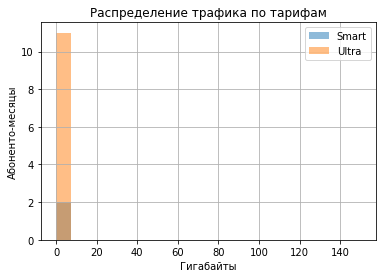

In [339]:
#Распределение трафика по тарифам:
smart_users['gb'].hist(range=(0, 150), bins = 20, alpha = .50)
ultra_users['gb'].hist(range=(0, 150), bins = 20, alpha = .50)
plt.title('Распределение трафика по тарифам')
plt.xlabel('Гигабайты')
plt.ylabel('Абоненто-месяцы')
plt.legend(['Smart', 'Ultra'])
plt.show()


График имеет вид распределения Пуассона, стремящегося к нормальному. График тарифа Ultra больше тяготеет влево, что говорит о более экономном расходовании интернет трафика этими абонентами.

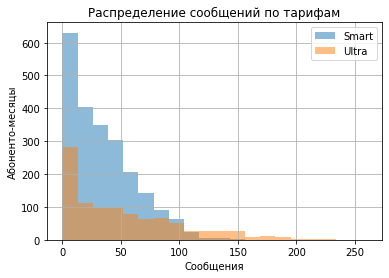

In [340]:
#Распределение сообщений по тарифам:
smart_users['messages'].hist(range=(0, 260), bins = 20, alpha = .50)
ultra_users['messages'].hist(range=(0, 260), bins = 20, alpha = .50)
plt.title('Распределение сообщений по тарифам')
plt.xlabel('Сообщения')
plt.ylabel('Абоненто-месяцы')
plt.legend(['Smart', 'Ultra'])
plt.show()

Снова Пуассон. На этот раз хвост справа у тарифа Ultra . Видимо, среди пользователей более дорогого тарифа больше любителей архаичных смс, нежеле мессенджеров. Характер схож, но у Ultra сильнее выделяется группа абоненотов, не выходящих за 10 сообщений в месяц, по сравнению с остальными данными.

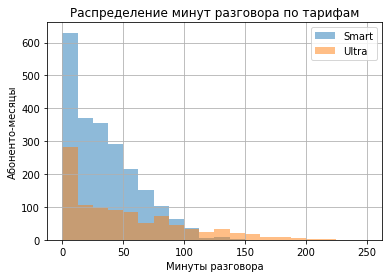

In [341]:
#Распределение минут разговора по тарифам:
smart_users['messages'].hist(range=(0, 250), bins = 20, alpha = .50)
ultra_users['messages'].hist(range=(0, 250), bins = 20, alpha = .50)
plt.title('Распределение минут разговора по тарифам')
plt.xlabel('Минуты разговора')
plt.ylabel('Абоненто-месяцы')
plt.legend(['Smart', 'Ultra'])
plt.show()

Пуассон. Снова хвост у Ultra. Более дорогие абоненты не зря платят за обслуживание, они и наговаривают по телефону больше. У Ultra снова видно сильнее разницу абонентов, не отправляющих более 10 смс в месяц.

Посмотрим на статистику тарифов:

In [342]:
smart_users_count = (users['tariff'] == 'smart').sum()
ultra_users_count = (users['tariff'] == 'ultra').sum()

print('число абонентов Smart:', smart_users_count)
print('число абонентов Ultra:', ultra_users_count)

число абонентов Smart: 351
число абонентов Ultra: 149


In [343]:
print('Годовая выручка от Smart:', smart_users['profit'].sum())
print('Годовая выручка от Ultra:', ultra_users['profit'].sum())

Годовая выручка от Smart: 2885751.0
Годовая выручка от Ultra: 2036100.0


In [344]:
#Посчитаю сколько минут, сообщений и трафика нужно пользователям тарифа Smart в месяц:
smart_pivot = smart_users.pivot_table(index='month_of', values=['minutes','messages','gb','profit'], aggfunc='sum')
smart_stat = pd.DataFrame(smart_pivot.to_records())
smart_stat

,month_of,gb,messages,minutes,profit
0,1,289831,620,6931,24525.0
1,2,673461,1397,17324,48001.0
2,3,1164537,2453,30034,89676.0
3,4,1509702,3443,41119,107866.0
4,5,2231353,4762,54618,169849.0
5,6,2593622,5478,64885,198259.0
6,7,3168466,6784,82079,247014.0
7,8,3908561,7905,99045,312340.0
8,9,4244377,8746,111439,326386.0
9,10,4932898,9927,125284,402667.0


In [345]:
#Посчитаю сколько минут, сообщений и трафика нужно пользователям тарифа Ultra в месяц:
ultra_pivot = ultra_users.pivot_table(index='month_of', values=['minutes','messages','gb','profit'], aggfunc='sum')
ultra_stat = pd.DataFrame(ultra_pivot.to_records())
ultra_stat

,month_of,gb,messages,minutes,profit
0,1,118382,304,3853,17550.0
1,2,281926,527,7131,45450.0
2,3,649423,1195,18117,74550.0
3,4,925878,1736,25191,108150.0
4,5,1298540,2536,34192,138150.0
5,6,1591148,3505,40295,171450.0
6,7,1866833,4536,49667,193050.0
7,8,2096565,5183,54653,222900.0
8,9,2210554,6013,62036,232800.0
9,10,2467856,7187,68644,254250.0


In [346]:
month_income

,user_id,month_of,calls,minutes,messages,gb,tariff,city,gb_used,profit
0,1000,5,17,159,22,2256,ultra,Краснодар,3.0,1950.0
1,1000,6,28,172,60,23257,ultra,Краснодар,23.0,1950.0
2,1000,7,41,340,75,14016,ultra,Краснодар,14.0,1950.0
3,1000,8,42,408,81,14070,ultra,Краснодар,14.0,1950.0
4,1000,9,46,466,57,14581,ultra,Краснодар,15.0,1950.0
...,...,...,...,...,...,...,...,...,...,...
3207,1489,8,0,0,17,11066,smart,Санкт-Петербург,11.0,550.0
3208,1489,9,0,0,32,17232,smart,Санкт-Петербург,17.0,950.0
3209,1489,10,0,0,21,19588,smart,Санкт-Петербург,20.0,1550.0
3210,1489,11,0,0,20,17516,smart,Санкт-Петербург,18.0,1150.0


In [347]:
mean_profit_by_smart_user = smart_users['profit'].groupby(smart_users['user_id']).mean()
mean_profit_by_ultra_user = ultra_users['profit'].groupby(ultra_users['user_id']).mean()

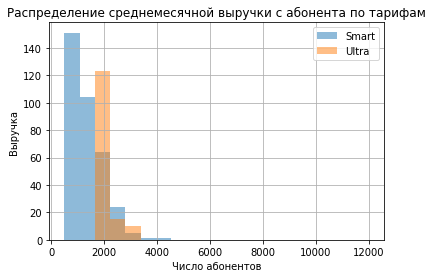

In [348]:
mean_profit_by_smart_user.hist(range=(500, 12000), bins = 20, alpha = .50)
mean_profit_by_ultra_user.hist(range=(500, 12000), bins = 20, alpha = .50)
plt.title('Распределение среднемесячной выручки с абонента по тарифам')
plt.xlabel('Число абонентов')
plt.ylabel('Выручка')
plt.legend(['Smart', 'Ultra'])
plt.show()

Среди абонентов Smart чаще встречаются те, кто выходит за лимиты тарифа. Они же в среднем больше платят за связь, чем абоненты Ultra.

Вывод по шагу 3

Нашёл средние и медианные значения для сообщений, звонков и трафика по месяцам для каждого тарифа. Абонентов с тарифом Smart почти в 2 раза больше, а выручки они генерируют  больше, чем абоненты с Ultra. Скорее всего это связано с более частым выходом за лимиты.

Для граффиков трафика, сообщений и звонков по месяцам характерно нормальное распределение. У звонков и сообщений есть заметные хвосты справа по тарифу Ultra. Это говорит о том, что обладатели этого тарифа не даром платят абоненствую плату -- они действительно много разговаривают и отправляют много смс.

Стандартные отклонения имеют заметные отличия касательно сообщений и минут разговора. Это вызвано бОльшим разбросом данных у абонентов с Ultra. Похоже, часть из них платит за более дорогой тариф просто из-за престижа, а какой-то части -- даже расширенных условий мало и они сильно выходят за лимиты.

4. Проверить гипотезы

* средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Гипотеза H₀: Средняя выручка пользователей тарифа "Ультра" и средняя выручка пользователей тарифа "Смарт" равны.

Альтернативная гипотеза: Средняя выручка пользователей тарифа "Ультра" не равна средней выручке пользователей тарифа "Смарт".

In [349]:
smart_by_month = smart_users['profit']
ultra_by_month = ultra_users['profit']

In [350]:
print(len(smart_by_month))
print()
print(len(ultra_by_month))

2229

983


In [351]:
alpha = .05
    
results = st.ttest_ind(
    smart_by_month, 
    ultra_by_month, equal_var = False)
    
print('p-значение: ', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  3.945371399300355e-246
Отвергаем нулевую гипотезу


In [352]:
smart_var = np.var(smart_by_month)
ultra_var= np.var(ultra_by_month)

In [353]:
equal = smart_var / ultra_var
equal

4.690770075360115

Дисперсии отличаются на 12%, это больше 5%, поэтому считаем, что они не равны.

* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Гипотеза H₀: Средняя выручка москвичей и выручка абонентов из других регионов равны.

Альтернативная гипотеза: Средняя выручка москвичей не равна выручке абонентов из других регионов.

In [354]:
#Делаю срезы данных по жителям Москвы и других регионов: 
moscow_users = month_income.query('city == "Москва"')
other_cities_users = month_income.query('city != "Москва"')

moscow_profit = moscow_users['profit']
other_cities_profit = other_cities_users['profit']

In [355]:
print(moscow_profit.mean())
print()
print(other_cities_profit.mean())

1550.150819672131

1528.1548808608763


In [356]:
alpha = .05

results = st.ttest_ind(moscow_profit, other_cities_profit, equal_var = False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5224187172009245
Не получилось отвергнуть нулевую гипотезу


In [357]:
moscow_var = np.var(moscow_profit)
other_var= np.var(other_cities_profit)

In [358]:
equal_2 = other_var / moscow_var
equal_2

1.1604054489443303

Нулевые гипотезы сформулировал по условию, альтернативные им - как противоположный вариант подтверждения нулевых гипотез.

В результате проверок получилось, что одна из гипотез не подтвердились. Получается, что средняя выручка москвичей и выручка абонентов из других регионов почти одинаковы.

5. Общий вывод:

Абонентов с тарифом Smart почти в 2 раза больше (351 против 149), но выручки они генерируют  больше , чем абоненты с Ultra. Скорее всего это связано с более частым выходом за лимиты. Это же подтверждается графиком распределения среднемесячной выручки.

Для граффиков трафика, сообщений и звонков по месяцам характерно нормальное распределение. У звонков и сообщений есть заметные хвосты справа по тарифу Ultra. Это говорит о том, что обладатели этого тарифа не даром платят абоненствую плату -- они действительно много разговаривают и отправляют много смс.

Стандартные отклонения имеют заметные отличия касательно сообщений и минут разговора. Это вызвано бОльшим разбросом данных у абонентов с Ultra. Похоже, часть из них платит за более дорогой тариф просто из-за престижа, а какой-то части -- даже расширенных условий мало и они сильно выходят за лимиты.

По предложенным гипотезам сформулировал нулевые и альтернативные. Проверка методом st.ttest_ind в одном из случаев отвергла нулевую гипотезу, что позволяет сделать 2 заключения:
* Средняя выручка москвичей почти равна выручке абонентов из других регионов.
* Средняя выручка по пользователям тарифа "Ультра" не равна средней выручке по пользователям тарифа "Смарт".

Подводя итог, можно сказать, что для большинства клиентов тариф Ultra будет лучше. Он позволит реже выходить за пределы лимитов, а соответственно - платить меньше.

Для оператора же самым выгодным тарифом будет Smart, так как пользователи часто привышают лемит.